# Data Cleaning New Data

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

## Load Data

In [2]:
ecom_data_df = pd.read_csv("../dataset/processed/ecom_data.csv")

## Cleaning

In [3]:
missing_values = ecom_data_df.isnull().sum()
print(missing_values[missing_values > 0])

customer_zip_code_prefix         594
customer_city                    632
customer_state                   627
order_status                     668
order_purchase_timestamp         628
order_approved_at                639
order_delivered_carrier_date     768
order_delivered_customer_date    754
order_estimated_delivery_date    591
payment_sequential               578
payment_type                     614
payment_installments             613
payment_value                    589
order_item_id                    554
shipping_limit_date              605
product_category_name            736
product_name_lenght              658
product_description_lenght       762
product_photos_qty               846
product_weight_g                 686
product_length_cm                535
product_height_cm                522
product_width_cm                 523
dtype: int64


In [4]:
# fill information about customer with "N/A"
col_to_fills = ["customer_zip_code_prefix", "customer_city", "customer_state"]
ecom_data_df[col_to_fills] = ecom_data_df[col_to_fills].fillna("N/A")

print(ecom_data_df[col_to_fills].isnull().sum())

customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [5]:
# see unique value from product_name
print(ecom_data_df["product_category_name"].unique())
print(f"amount unique value: {ecom_data_df['product_category_name'].nunique()}")

['climatizacao' 'brinquedos' 'informatica_acessorios' 'beleza_saude'
 'telefonia' 'cama_mesa_banho' 'automotivo' 'eletroportateis'
 'casa_conforto' 'papelaria' 'pet_shop' 'esporte_lazer' 'artes'
 'fashion_bolsas_e_acessorios' 'perfumaria' 'instrumentos_musicais' nan
 'moveis_decoracao' 'relogios_presentes' 'eletronicos'
 'utilidades_domesticas' 'construcao_ferramentas_ferramentas'
 'industria_comercio_e_negocios' 'malas_acessorios' 'ferramentas_jardim'
 'cool_stuff' 'bebidas' 'eletrodomesticos' 'tablets_impressao_imagem'
 'pcs' 'consoles_games' 'construcao_ferramentas_construcao' 'bebes'
 'moveis_cozinha_area_de_servico_jantar_e_jardim' 'alimentos'
 'moveis_escritorio' 'livros_interesse_geral'
 'portateis_cozinha_e_preparadores_de_alimentos' 'telefonia_fixa'
 'eletrodomesticos_2' 'market_place' 'moveis_sala' 'dvds_blu_ray' 'audio'
 'casa_construcao' 'construcao_ferramentas_jardim' 'alimentos_bebidas'
 'fashion_calcados' 'agro_industria_e_comercio' 'musica'
 'artigos_de_natal' 'livros_t

In [6]:
# fill product_category_name with "unknown_category"
# fill information about customer with "N/A"
ecom_data_df["product_category_name"] = ecom_data_df["product_category_name"].fillna(
    "unknown_category"
)

print(ecom_data_df["product_category_name"].isnull().sum())

0


### clean product columns

ValueError: supplied range of [0.0, inf] is not finite

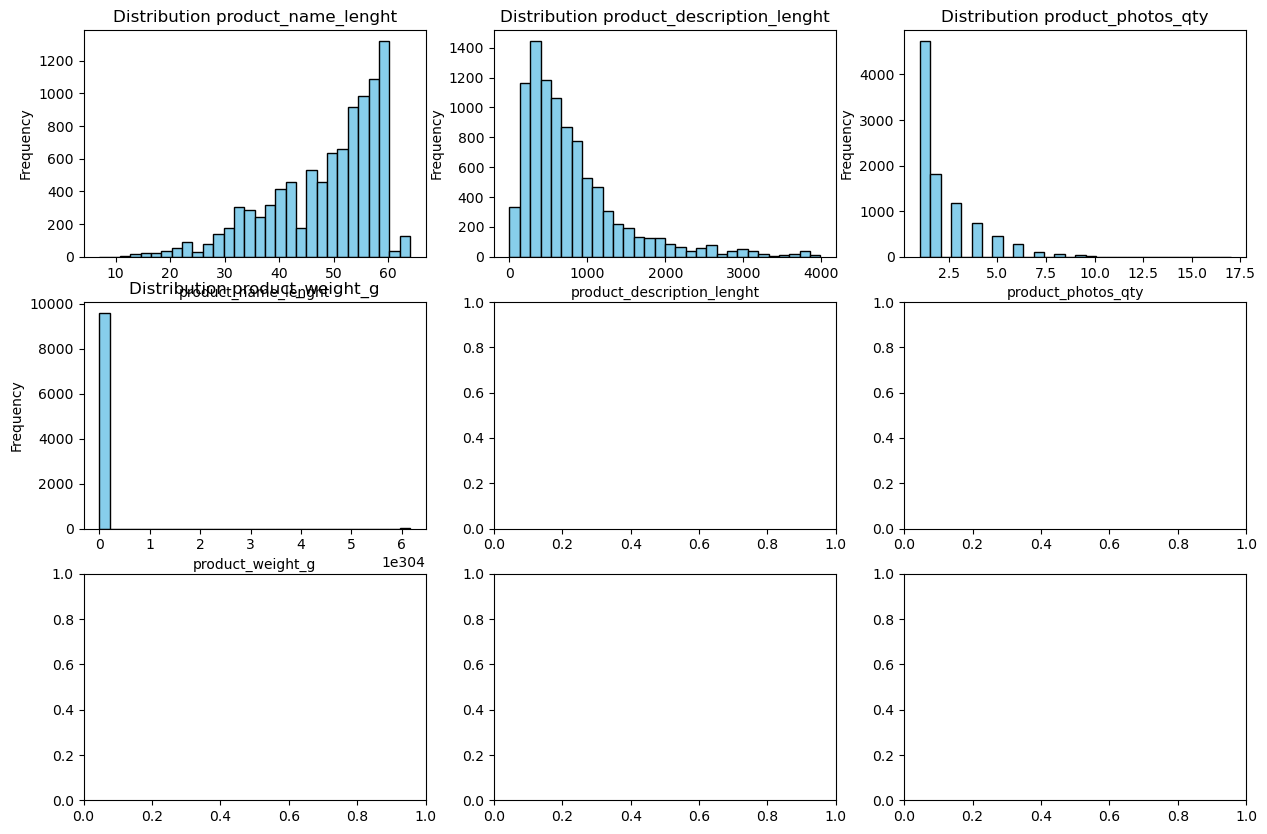

In [35]:
# # make histogram for numerical product columns
numerical_product_cols = [
    "product_name_lenght",
    "product_description_lenght",
    "product_photos_qty",
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm",
]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_product_cols):
    ax = axes[i]
    ax.hist(ecom_data_df[col].dropna(), bins=30, color="skyblue", edgecolor="black")
    ax.set_title(f"Distribution {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

if len(numerical_product_cols) < len(axes):
    for i in range(numerical_product_cols), len(axes):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

CLEANING COLUMN `product_weight_g`

In [ ]:
# check data type column "product_weight_g"
print(f"data type product_weight_g: {ecom_data_df['product_weight_g'].dtype}")
print(
    f"unique value product_weight_g: {ecom_data_df['product_weight_g'].unique()[:20]}"
)

data type product_weight_g: float64
unique value product_weight_g: [ 2000.   200.   650.  1067.   100.  2555.  2313.   800.    nan 17325.
   225.   150.   128.  1900.   378.   250.  5900.    50.   125.  1350.]


In [ ]:
has_inf = np.isinf(ecom_data_df["product_weight_g"]).any()
print(f"is there positive infinite value in product_weight_g: {has_inf}")

has_neg_inf = np.isneginf(ecom_data_df["product_weight_g"]).any()
print(f"is there negative value in product_weight_g: {has_neg_inf}")

is there positive infinite value in product_weight_g: True
is there negative value in product_weight_g: False


In [ ]:
# Hitung jumlah baris dengan nilai tak hingga positif di product_weight_g
jumlah_inf = np.isinf(ecom_data_df["product_weight_g"]).sum()
print(f"Number of rows with positive infinite values in product_weight_g: {jumlah_inf}")

Number of rows with positive infinite values in product_weight_g: 59


In [ ]:
# remove infinite value from product_weight_g
ecom_data_df = ecom_data_df[~np.isinf(ecom_data_df["product_weight_g"])]

infi_after_removal = np.isinf(ecom_data_df["product_weight_g"]).sum()
print(f"number of infinite value after dropping: {infi_after_removal} data")

number of infinite value after dropping: 0 data


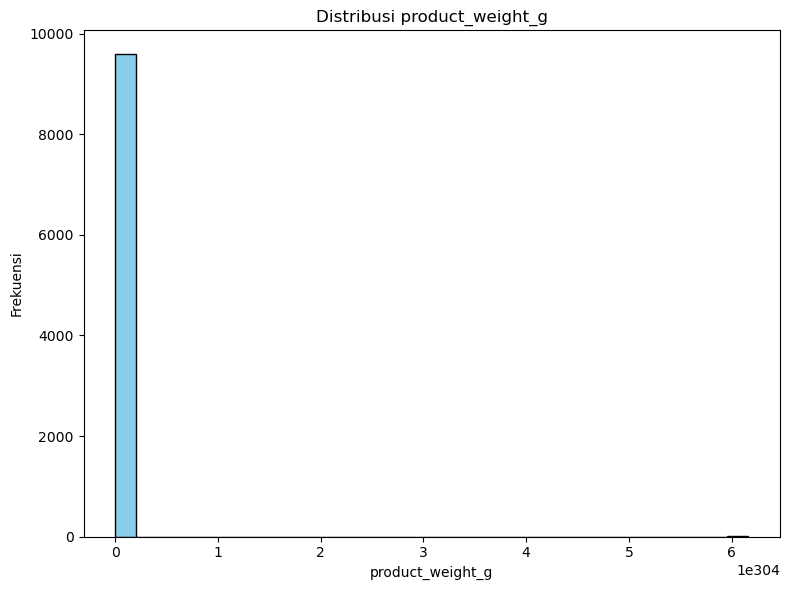

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(
    ecom_data_df["product_weight_g"].dropna(),
    bins=30,
    color="skyblue",
    edgecolor="black",
)
plt.title("Distribusi product_weight_g")
plt.xlabel("product_weight_g")
plt.ylabel("Frekuensi")
plt.tight_layout()
plt.show()

CLEANING COLUMNS `product_name_lenght`, `product_description_lenght`, `product_photos_qty`,
                            `product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm`

In [39]:
# Kolom-kolom numerik terkait produk yang punya missing values
numerical_product_cols = [
    "product_name_lenght",
    "product_description_lenght",
    "product_photos_qty",
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm",
]

# Hitung median untuk setiap kolom
median_values = ecom_data_df[numerical_product_cols].median()
print(median_values)

ecom_data_df = ecom_data_df.fillna(median_values)

print(ecom_data_df[numerical_product_cols].isnull().sum())

product_name_lenght            52.0
product_description_lenght    603.0
product_photos_qty              1.0
product_weight_g              688.0
product_length_cm              25.0
product_height_cm              13.0
product_width_cm               20.0
dtype: float64
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


In [45]:
ecom_data_df[
    [
        "order_purchase_timestamp",
        "order_approved_at",
        "order_delivered_carrier_date",
        "order_delivered_customer_date",
        "order_estimated_delivery_date",
        "shipping_limit_date",
        "order_status",
    ]
].sample(5)

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,order_status
1458,2017-03-12 17:42:52,2017-03-12 17:42:52,2017-03-13 11:13:36,2017-03-16 14:34:11,2017-03-30 00:00:00,2017-03-16 17:42:52,delivered
6025,2017-05-17 18:52:13,2017-05-17 19:05:11,2017-05-18 08:35:44,2017-05-19 11:43:49,2017-05-30 00:00:00,2017-05-23 19:05:11,delivered
341,2017-05-24 09:16:40,2017-05-24 09:30:12,2017-05-26 14:13:03,2017-06-06 13:43:26,NaN,2017-05-30 09:30:12,delivered
1975,2018-04-16 19:27:56,2018-04-16 19:51:38,2018-04-17 16:35:57,2018-04-18 16:26:35,2018-04-26 00:00:00,2018-04-20 19:51:38,delivered
9197,2018-02-16 15:48:57,2018-02-16 16:07:06,2018-02-17 15:05:30,2018-02-23 23:59:22,2018-03-08 00:00:00,2018-02-22 15:07:06,delivered


In [ ]:
print(ecom_data_df["order_status"].unique())

[nan 'delivered' 'shipped' 'canceled' 'processing' 'invoiced']


CLEANING ORDER DATA

In [48]:
date_cols = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
    "shipping_limit_date",
]

for col in date_cols:
    try:
        ecom_data_df[col] = pd.to_datetime(ecom_data_df[col], errors="coerce")
        print(f"column: {col}. Success convert to datetime")
    except Exception as e:
        print(f"there is error or column {col} has been format to datetime: {e}")

column: order_purchase_timestamp. Success convert to datetime
column: order_approved_at. Success convert to datetime
column: order_delivered_carrier_date. Success convert to datetime
column: order_delivered_customer_date. Success convert to datetime
column: order_estimated_delivery_date. Success convert to datetime
column: shipping_limit_date. Success convert to datetime


In [ ]:
try:
    ecom_data_df["order_purchase_timestamp"].fillna(
        ecom_data_df["order_approved_at"], inplace=True
    )
    print(
        "Number of null values in 'order_purchase_timestamp' after filling:",
        ecom_data_df["order_purchase_timestamp"].isnull().sum(),
    )
except KeyError as e:
    # Catch KeyError if either 'order_purchase_timestamp' or 'order_approved_at' column is not found
    print(
        f"Error: Column not found - {e}. Please ensure that the column exists in the DataFrame."
    )

except AttributeError as e:
    # Catch AttributeError if ecom_data_df is not a DataFrame or if the column is not a Series
    print(
        f"Error: Attribute issue - {e}. Please verify that 'ecom_data_df' is a pandas DataFrame and the column name is correct."
    )

except Exception as e:
    # Catch any other unexpected errors
    print(f"An unexpected error occurred: {e}")

Number of null values in 'order_purchase_timestamp' after filling: 31
